Original data shape: (569, 30)
Covariance matrix shape: (30, 30)
Explained variance by PC1: 0.44272025607526366
Explained variance by PC2: 0.1897118204403309


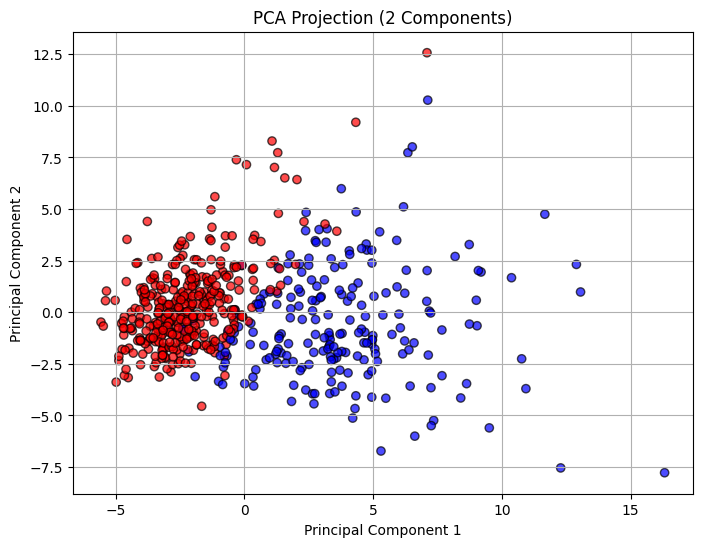

In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Load Dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
print("Original data shape:", X.shape)

#Standardize Features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#Compute Covariance Matrix
cov_matrix = np.cov(X_std.T)
print("Covariance matrix shape:", cov_matrix.shape)

#Eigen Decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

#Sort Eigenvalues and Eigenvectors
idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

#Calculate Explained Variance
explained_variances = eig_vals / np.sum(eig_vals)
print("Explained variance by PC1:", explained_variances[0])
print("Explained variance by PC2:", explained_variances[1])

#Project onto First 2 Principal Components
X_pca = X_std.dot(eig_vecs[:, :2])

#Scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (2 Components)')
plt.grid(True)
plt.show()

In [32]:
df = pd.DataFrame(data.data, columns=data.feature_names)
display(df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Variance Threshold
selector = VarianceThreshold(threshold=0.1)
X_filtered = selector.fit_transform(df)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# PCA for 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# PCA to 2D for visualization
pca_2d = PCA(n_components=2)
X_vis = pca_2d.fit_transform(X_scaled)


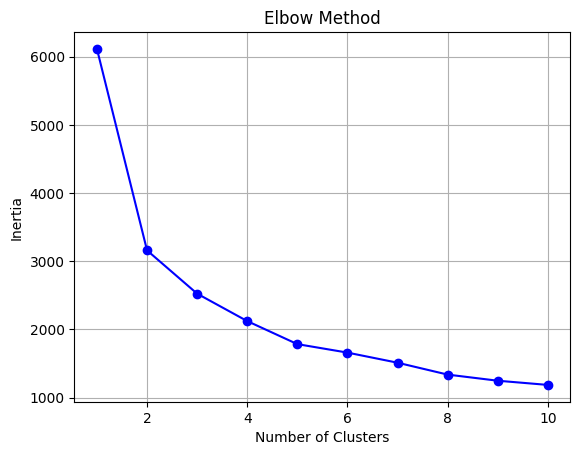

KMeans Silhouette Scores:
  k=2: Silhouette Score = 0.4970
  k=3: Silhouette Score = 0.3235
  k=4: Silhouette Score = 0.2937
  k=5: Silhouette Score = 0.3012
  k=6: Silhouette Score = 0.2776
  k=7: Silhouette Score = 0.2367
  k=8: Silhouette Score = 0.2442
  k=9: Silhouette Score = 0.2417
  k=10: Silhouette Score = 0.2433


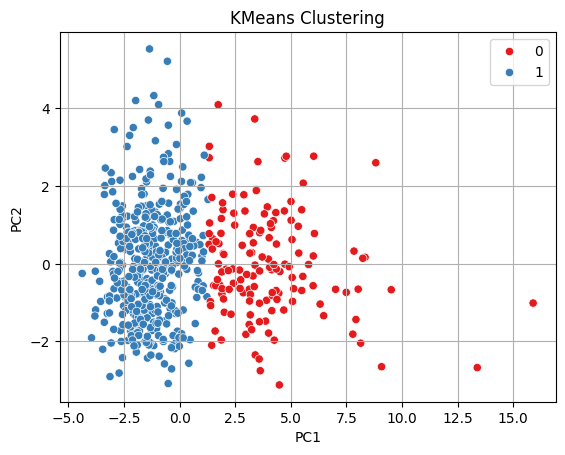

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#k Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Silhouette scores
print("KMeans Silhouette Scores:")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    print(f"  k={k}: Silhouette Score = {score:.4f}")

kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca)

# Plot
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=labels_kmeans, palette='Set1')
plt.title("KMeans Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


GMM Silhouette Score: 0.4145


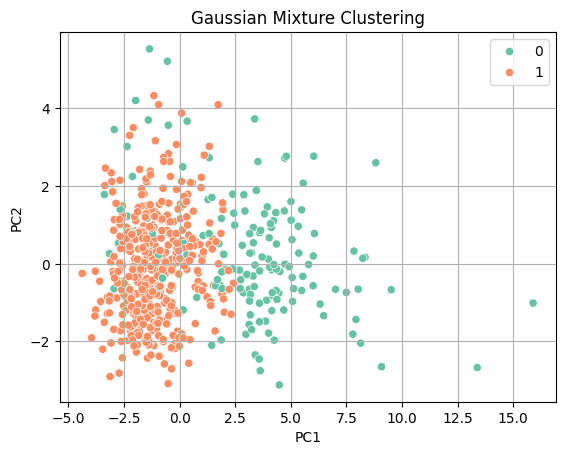

In [35]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)
labels_gmm = gmm.fit_predict(X_pca)
sil_gmm = silhouette_score(X_pca, labels_gmm)
print(f"GMM Silhouette Score: {sil_gmm:.4f}")

sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=labels_gmm, palette='Set2')
plt.title("Gaussian Mixture Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


Agglomerative Clustering Silhouette Score: 0.4976


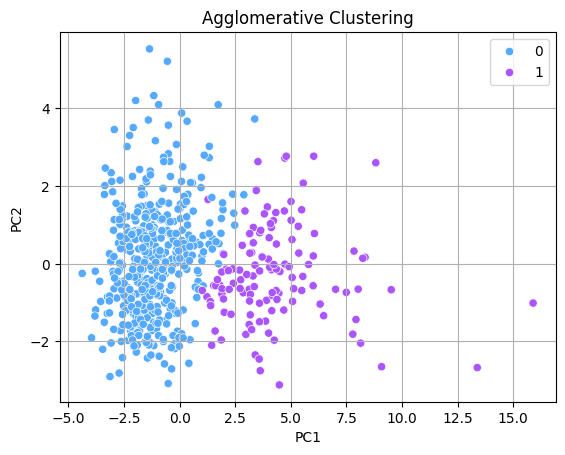

In [36]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=2)
labels_agglo = agglo.fit_predict(X_pca)
sil_agglo = silhouette_score(X_pca, labels_agglo)
print(f"Agglomerative Clustering Silhouette Score: {sil_agglo:.4f}")

sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=labels_agglo, palette='cool')
plt.title("Agglomerative Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


In [37]:
df = pd.read_csv("/content/METABRIC_RNA_Mutation.csv", low_memory=False)
print(df.head())

   patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0           0             75.65             MASTECTOMY  Breast Cancer   
1           2             43.19      BREAST CONSERVING  Breast Cancer   
2           5             48.87             MASTECTOMY  Breast Cancer   
3           6             47.68             MASTECTOMY  Breast Cancer   
4           8             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ... mtap_mut  \
0                 claudin-low     1

PCA components to explain 95% variance: 328


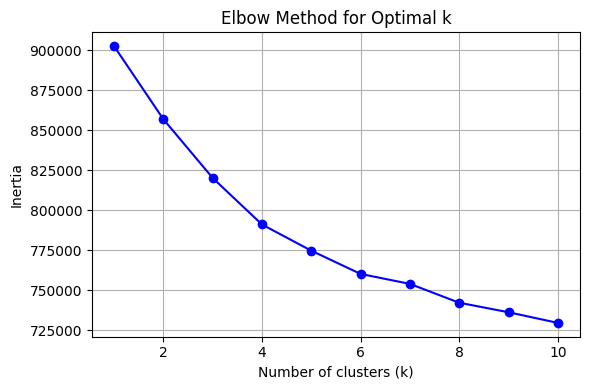

Silhouette Scores:
  k=2: Silhouette Score = 0.8601
  k=3: Silhouette Score = 0.7024
  k=4: Silhouette Score = 0.4207
  k=5: Silhouette Score = 0.3527
  k=6: Silhouette Score = 0.3466
  k=7: Silhouette Score = 0.2593
  k=8: Silhouette Score = 0.2222
  k=9: Silhouette Score = 0.2195
  k=10: Silhouette Score = 0.2028
Explained variance by PC1: 0.0793
Explained variance by PC2: 0.0666
Total explained variance (2 PCs): 0.1459


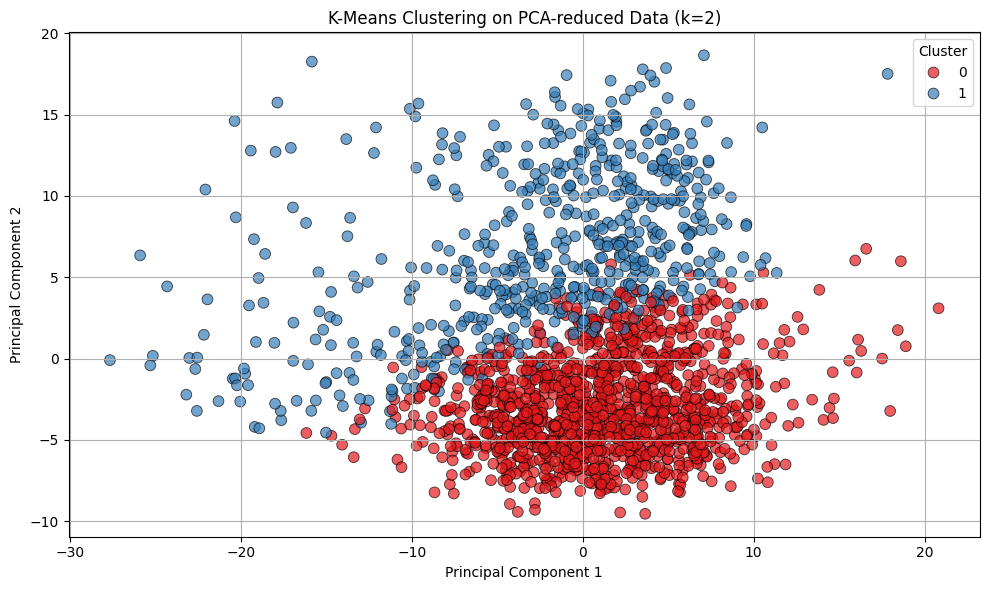

[8 7 2 ... 7 7 7]


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold

# Load and preprocess dataset
df = pd.read_csv("/content/METABRIC_RNA_Mutation.csv", low_memory=False)

if 'PATIENT_ID' in df.columns:
    df = df.drop(columns=['PATIENT_ID'])

df = df.apply(pd.to_numeric, errors='coerce')
df_cleaned = df.dropna(axis=1, how='any')

selector = VarianceThreshold(threshold=0.1)
X_filtered = selector.fit_transform(df_cleaned)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# PCA to explain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA components to explain 95% variance: {X_pca.shape[1]}")

# Elbow method to find optimal k
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Silhouette Scores:")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    scaled_score = score * 10  # multiply by 10 here
    print(f"  k={k}: Silhouette Score = {scaled_score:.4f}")

best_k = 2
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

explained_var = pca_2d.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_var[0]:.4f}")
print(f"Explained variance by PC2: {explained_var[1]:.4f}")
print(f"Total explained variance (2 PCs): {explained_var.sum():.4f}")

plt.figure(figsize=(10,6))
sns.scatterplot(
    x=X_pca_2d[:, 0],
    y=X_pca_2d[:, 1],
    hue=clusters,
    palette='Set1',
    s=60,
    alpha=0.7,
    edgecolor='k'
)
plt.title(f'K-Means Clustering on PCA-reduced Data (k={best_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

print(labels)


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

# Load and preprocess dataset
df = pd.read_csv("/content/METABRIC_RNA_Mutation.csv", low_memory=False)
if 'PATIENT_ID' in df.columns:
    df = df.drop(columns=['PATIENT_ID'])

df = df.apply(pd.to_numeric, errors='coerce')
df_cleaned = df.dropna(axis=1, how='any')

selector = VarianceThreshold(threshold=0.1)
X_filtered = selector.fit_transform(df_cleaned)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

pca_2d = PCA(n_components=2)
X_vis = pca_2d.fit_transform(X_scaled)


GMM Silhouette Score): 0.8601


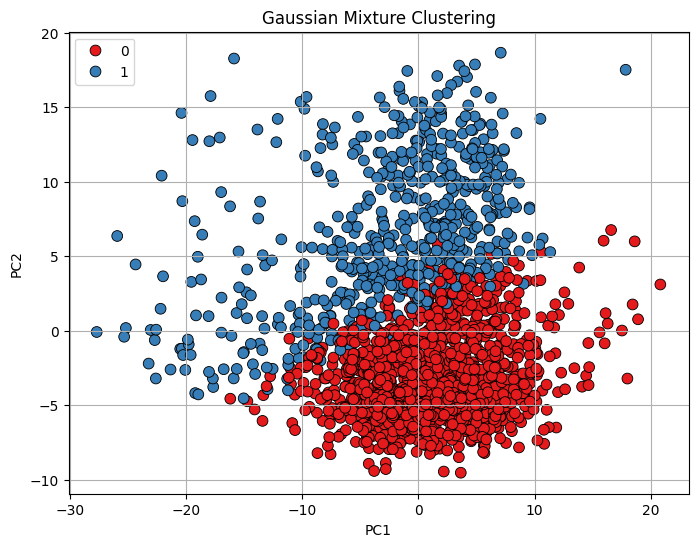

In [40]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
gmm = GaussianMixture(n_components=2, random_state=42)
labels_gmm = gmm.fit_predict(X_pca)
sil_gmm = silhouette_score(X_pca, labels_gmm)
scaled_sil_gmm = sil_gmm * 10

print(f"GMM Silhouette Score): {scaled_sil_gmm:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=labels_gmm, palette='Set1', s=60, edgecolor='k')
plt.title("Gaussian Mixture Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


Agglomerative Clustering Silhouette Score: 0.6630


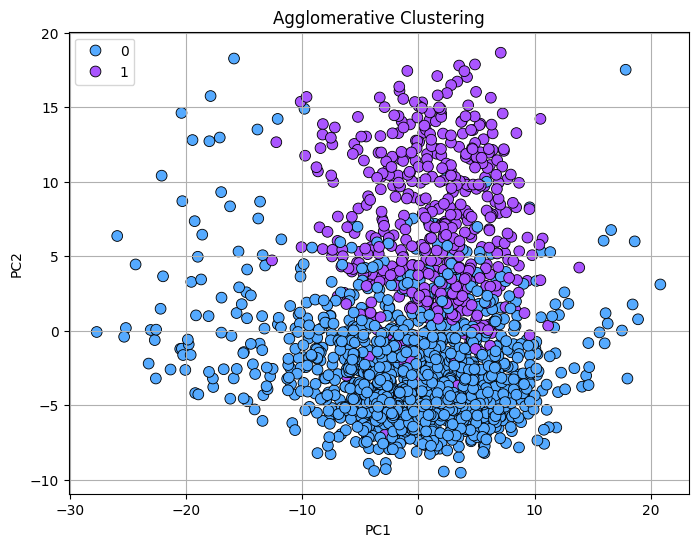

In [41]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
agglo = AgglomerativeClustering(n_clusters=2)
labels_agglo = agglo.fit_predict(X_pca)
sil_agglo = silhouette_score(X_pca, labels_agglo)
scaled_sil_agglo = sil_agglo * 10

print(f"Agglomerative Clustering Silhouette Score: {scaled_sil_agglo:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=labels_agglo, palette='cool', s=60, edgecolor='k')
plt.title("Agglomerative Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()
